In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [4]:
### LOAD THE EXPERIMENT
experiment = "1by2_5cycles_isoc"


#----
path_exp = f"data/{experiment}/"
pack = None
with open(path_exp+"model.pkl", 'rb') as f:
    pack = pickle.load(f)

print(f"Detailing epxeriment: {experiment}")
print(f"{pack.series}s-{pack.parallel}p Configuration") 
print(f"{pack.cycles} Cycles, CC-discharge, CC-charge, CV-charge protocol") 
print(f"Applied current (CC phases): {pack.iappt}")
print(f"Voltage cutoffs: {pack.cutoffs}")
print(f"Min current cutoff (CV-phase): {pack.min_current}")

data = pd.read_csv(path_exp+"data.csv", index_col=[0,1,2])
CYCLE = data.index.get_level_values(0)
PROTOCOL = data.index.get_level_values(1)

Detailing epxeriment: 1by2_5cycles_isoc
1s-2p Configuration
5 Cycles, CC-discharge, CC-charge, CV-charge protocol
Applied current (CC phases): 26.6
Voltage cutoffs: (2.5, 4.1)
Min current cutoff (CV-phase): 2.66


In [6]:
#toplot = [1] + list(range(10, 110, 10))
toplot = range(1, pack.cycles+1)

group = data.loc[
    (CYCLE.isin(toplot)) & 
    (PROTOCOL.str.contains("-discharge"))
]
# c = pack.cells[0,0]
# print(c.pos.eps_n.value)
group


Global Time         Time  Pack Voltage  Pack Current  \
1 CC-discharge 0       0.000000     0.000000      3.972042         -26.6   
               1      72.727273    72.727273      3.954087         -26.6   
               2     145.454545   145.454545      3.942404         -26.6   
               3     218.181818   218.181818      3.931761         -26.6   
               4     290.909091   290.909091      3.921874         -26.6   
...                         ...          ...           ...           ...   
5 CC-discharge 83  73919.730490  6036.363636      3.214144         -26.6   
               84  73992.457763  6109.090909      3.167692         -26.6   
               85  74065.185036  6181.818182      3.095227         -26.6   
               86  74137.912309  6254.545455      2.925202         -26.6   
               87  74189.958743  6306.591889      2.500010         -26.6   

                   String 1 Iapp  String 2 Iapp  \
1 CC-discharge 0       -9.668535     -16.931465   
               1      -10.486669     -16.113331   
               2      -10.932737     -15.667263   
               3      -11.285687     -15.314313   
               4      -11.570525     -15.029475   
...                          ...            ...   
5 CC-discharge 83     -14.761812     -11.838188   
               84     -15.060556     -11.539444   
               85     -15.756437     -10.843563   
               86     -16.011437     -10.588563   
               87     -14.595365     -12.004635   

                   Cell 1,1 Cathode Concentration  \
1 CC-discharge 0                     25705.886789   
               1                     25905.790663   
               2                     26072.739973   
               3                     26244.626663   
               4                     26421.051570   
...                                           ...   
5 CC-discharge 83                    45238.236824   
               84                    45467.295742   
               85                    45705.560092   
               86                    45953.162237   
               87                    46117.348945   

                   Cell 1,1 Anode Concentration  Cell 1,1 Anode SEI Length  \
1 CC-discharge 0                   22429.582470               5.000000e-09   
               1                   22235.922378               5.000000e-09   
               2                   22056.571159               5.000000e-09   
               3                   21870.866589               5.000000e-09   
               4                   21680.047962               5.000000e-09   
...                                         ...                        ...   
5 CC-discharge 83                   1252.045378               5.202385e-09   
               84                   1003.875922               5.202385e-09   
               85                    746.566103               5.202385e-09   
               86                    479.025462               5.202385e-09   
               87                    298.763835               5.202385e-09   

                   Cell 1,1 Voltage  Cell 1,1 Capacity by Area  \
1 CC-discharge 0           3.972042                   0.000000   
               1           3.954087                   0.203588   
               2           3.942404                   0.419946   
               3           3.931761                   0.644374   
               4           3.921874                   0.875245   
...                             ...                        ...   
5 CC-discharge 83          3.214144                  23.150859   
               84          3.167692                  23.452095   
               85          3.095227                  23.763378   
               86          2.925202                  24.084265   
               87          2.500010                  24.305512   

                   Cell 1,2 Cathode Concentration  \
1 CC-discharge 0                     24679.714905   
               1     

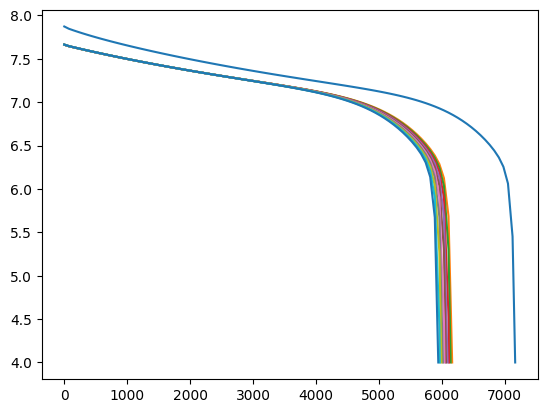

In [19]:
for cycle in toplot:
    plt.plot(group.loc[(cycle), 'Time'], group.loc[(cycle), 'Pack Voltage'])

C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(group2.loc[(1), 'Global Time'], group2.loc[(1), pack.cells[0,0].voltage.name], 'ro', markersize=4)
C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(single.loc[('C1'), 'Global Time'], single.loc[('C1'), "Cell1 Voltage"], color='blue')
C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(single.loc[('C2'), 'Global Time'], single.loc[('C2'), "Cell1 Voltage"], color='blue')


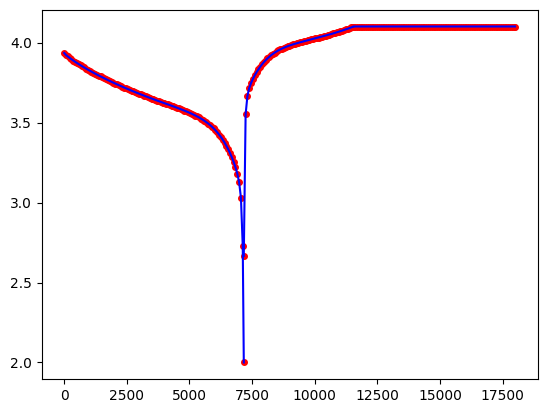

In [55]:
group2 = data.loc[
    (CYCLE.isin(toplot))
]

plt.plot(group2.loc[(1), 'Global Time'], group2.loc[(1), pack.cells[0,0].voltage.name], 'ro', markersize=4)

single = pd.read_csv("data/CCCV-3.csv", index_col=[0,1])
plt.plot(single.loc[('C1'), 'Global Time'], single.loc[('C1'), "Cell1 Voltage"], color='blue')
plt.plot(single.loc[('C2'), 'Global Time'], single.loc[('C2'), "Cell1 Voltage"], color='blue')

plt.savefig("here.png")